In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

# Learning Rate Schedule 

* A CNN model is constructed to train on CIFAR-10

* The following learning rate decay schedules are used : constant learning rate, time-based decay, step decay, exponential decay
    
* Model performance of using different learning rate schedules are compared

In [ ]:
from __future__ import print_function
import numpy as np
import math

import matplotlib.pyplot as plt
# If you're running this notebook locally, uncomment this line
%matplotlib inline  
import tensorflow
#import keras4/1AX4XfWhgsJrYEkvwYG-4ZsoAxFnN8kmgduhCqA6dm6Xcvmf_ZtEEPRwgnfM
import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler

# Load CIFAR-10 data

In [ ]:
batch_size = 64
num_classes = 2
epochs = 50

# input image dimensions
img_rows, img_cols = 32, 32   

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()   

# Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))     

y_train = np.array(y_train[train_picks]==5,dtype=int)
y_test = np.array(y_test[test_picks]==5,dtype=int)

X_train = X_train[train_picks]
X_test = X_test[test_picks]

# Re-format according to Keras's setting
# channel: RGB channels
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = tensorflow.keras.utils.to_categorical(np.ravel(y_test), num_classes)

170498071/170498071 [==============================] - 2s 0us/step
X_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples


# Define function to construct CNN model

In [ ]:
def cnn_model() : 
    model = Sequential()
    model.add(Conv2D(4, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    return(model)

# Define function to plot model accuracy

In [ ]:
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_accuracy'],label='validation')
    plt.plot(range(1,epochs+1),history.history['accuracy'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
    plt.grid(True)
    plt.title("Model Accuracy")
    # If you're running this notebook on databricks, use display to generate graphs
    #display(fig)
    # If you're running this notebook locally, use plt.show to generate graphs
    plt.show()
    plt.close(fig)
    

# Constant learning rate

In [ ]:
# define CNN model
model1 = cnn_model()

# define SGD optimizer
learning_rate = 0.1
sgd = SGD(lr=learning_rate, momentum=0.0, decay=0.0, nesterov=False) 

# compile the model
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# fit the model
history1 = model1.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=2,
                validation_data=(X_test, y_test))

# plot model accuracy
plot_fig(1, history1)

Epoch 1/50
157/157 - 8s - loss: 0.6883 - accuracy: 0.5379 - val_loss: 0.6912 - val_accuracy: 0.5125 - 8s/epoch - 49ms/step
Epoch 2/50
157/157 - 7s - loss: 0.6748 - accuracy: 0.5807 - val_loss: 0.6572 - val_accuracy: 0.6155 - 7s/epoch - 43ms/step
Epoch 3/50
157/157 - 7s - loss: 0.6713 - accuracy: 0.5856 - val_loss: 0.6565 - val_accuracy: 0.6120 - 7s/epoch - 43ms/step
Epoch 4/50
157/157 - 7s - loss: 0.6674 - accuracy: 0.5946 - val_loss: 0.7126 - val_accuracy: 0.5000 - 7s/epoch - 43ms/step
Epoch 5/50
157/157 - 7s - loss: 0.6638 - accuracy: 0.6001 - val_loss: 0.6519 - val_accuracy: 0.6310 - 7s/epoch - 46ms/step
Epoch 6/50
157/157 - 7s - loss: 0.6600 - accuracy: 0.6066 - val_loss: 0.6472 - val_accuracy: 0.6285 - 7s/epoch - 43ms/step
Epoch 7/50
157/157 - 7s - loss: 0.6495 - accuracy: 0.6192 - val_loss: 0.6532 - val_accuracy: 0.6130 - 7s/epoch - 44ms/step
Epoch 8/50
157/157 - 8s - loss: 0.6466 - accuracy: 0.6247 - val_loss: 0.6356 - val_accuracy: 0.6350 - 8s/epoch - 49ms/step
Epoch 9/50
157/1

# Step decay

Text(0.5, 1.0, 'Learning rate')

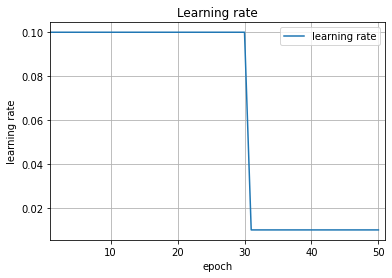

In [ ]:
learning_rate = 0.1
decay_rate = learning_rate / epochs
lrs = [learning_rate] * epochs
for i in range(30, epochs):
    lrs[i] = learning_rate * 0.1

# plot learning rate
fig = plt.figure()
plt.plot(range(1,epochs+1), lrs, label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,epochs+1])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
# If you're running this notebook on databricks, use display to generate graphs
# display(fig)
# If you're running this notebook locally, use plt.show to generate graphs
# plt.show()
# plt.close(fig)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
157/157 - 2s - loss: 0.6938 - accuracy: 0.5033 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 2/50
157/157 - 1s - loss: 0.6938 - accuracy: 0.4913 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/50
157/157 - 1s - loss: 0.6936 - accuracy: 0.5036 - val_loss: 0.6925 - val_accuracy: 0.5085
Epoch 4/50
157/157 - 1s - loss: 0.6922 - accuracy: 0.5138 - val_loss: 0.6927 - val_accuracy: 0.4995
Epoch 5/50
157/157 - 1s - loss: 0.6901 - accuracy: 0.5248 - val_loss: 0.6792 - val_accuracy: 0.5620
Epoch 6/50
157/157 - 1s - loss: 0.6788 - accuracy: 0.5624 - val_loss: 0.6685 - val_accuracy: 0.5905
Epoch 7/50
157/157 - 1s - loss: 0.6687 - accuracy: 0.5917 - val_loss: 0.6535 - val_accuracy: 0.6145
Epoch 8/50
157/157 - 1s - loss: 0.6589 - accuracy: 0.6037 - val_loss: 0.6350 - val_accuracy: 0.6445
Epoch 9/50
157/157 - 1s - loss: 0.6500 - accuracy: 0.6184 - val_loss: 0.6438 - val_accuracy: 0.6150
Epoch 10/50
157/157 - 1s - loss: 0.6502 - accuracy: 0.6209 - val_loss: 0.6343 - val_accuracy: 0.6500

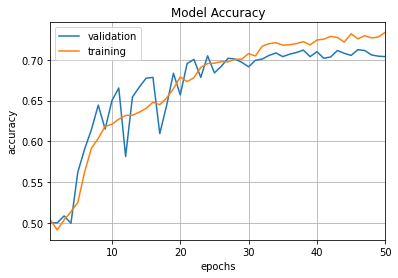

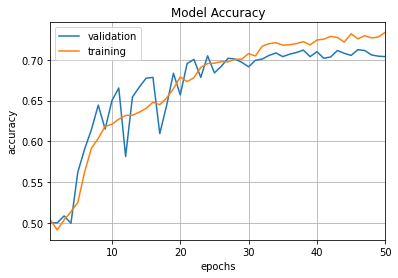

In [ ]:
# define CNN model
model2 = cnn_model()

# define SGD optimizer
learning_rate = 0.1
momentum = 0.5
sgd = SGD(lr=learning_rate, momentum=momentum, decay=0, nesterov=False)

# compile the model
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

def step_decay(epoch):
    initial_lrate = 0.1
    if epoch >= 30:
        lrate = initial_lrate * 0.1
    else:
        lrate = initial_lrate
    return lrate

# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]
# fit the model
history2 = model2.fit(X_train, y_train, 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2, 
                     validation_data=(X_test, y_test),
                     callbacks=callbacks_list)

# plot model accuracy
plot_fig(2, history2)

# Linear decay

Text(0.5, 1.0, 'Learning rate')

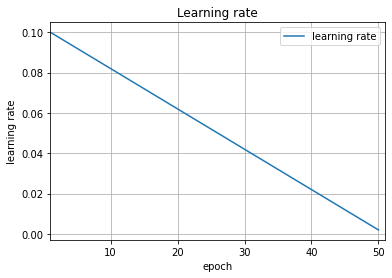

In [ ]:
learning_rate = 0.1
drop = 0.5
epochs_drop = 10.0
lrs = [learning_rate] * epochs
for i in range(1, epochs):
    lrs[i] = learning_rate * (1 - i / epochs)
  
# plot learning rate
fig = plt.figure()
plt.plot(range(1,epochs+1),lrs,label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,epochs+1])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
# If you're running this notebook on databricks, use display to generate graphs
# display(fig)
# If you're running this notebook locally, use plt.show to generate graphs
# plt.show()
# plt.close(fig)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
157/157 - 2s - loss: 0.6932 - accuracy: 0.5134 - val_loss: 0.6877 - val_accuracy: 0.5485
Epoch 2/50
157/157 - 1s - loss: 0.6817 - accuracy: 0.5685 - val_loss: 0.6666 - val_accuracy: 0.5875
Epoch 3/50
157/157 - 1s - loss: 0.6717 - accuracy: 0.5879 - val_loss: 0.6562 - val_accuracy: 0.6255
Epoch 4/50
157/157 - 1s - loss: 0.6593 - accuracy: 0.6060 - val_loss: 0.6615 - val_accuracy: 0.6035
Epoch 5/50
157/157 - 1s - loss: 0.6555 - accuracy: 0.6084 - val_loss: 0.6569 - val_accuracy: 0.6025
Epoch 6/50
157/157 - 1s - loss: 0.6454 - accuracy: 0.6263 - val_loss: 0.6498 - val_accuracy: 0.6175
Epoch 7/50
157/157 - 1s - loss: 0.6396 - accuracy: 0.6361 - val_loss: 0.6432 - val_accuracy: 0.6365
Epoch 8/50
157/157 - 1s - loss: 0.6417 - accuracy: 0.6293 - val_loss: 0.6529 - val_accuracy: 0.6060
Epoch 9/50
157/157 - 1s - loss: 0.6294 - accuracy: 0.6489 - val_loss: 0.6225 - val_accuracy: 0.6415
Epoch 10/50
157/157 - 1s - loss: 0.6209 - accuracy: 0.6506 - val_loss: 0.6217 - val_accuracy: 0.6375

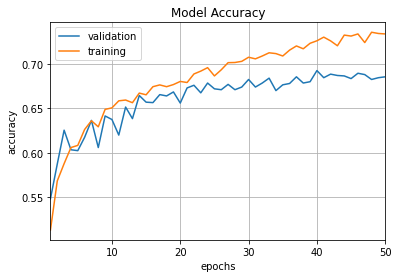

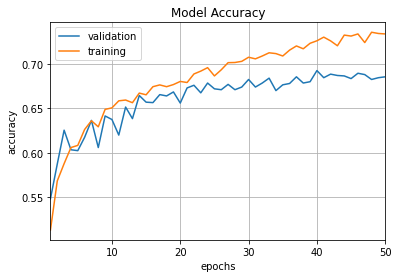

In [ ]:
# define CNN model
model3 = cnn_model()

# define SGD optimizer
momentum = 0.5
sgd = SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False) 

# compile the model
model3.compile(loss=keras.losses.categorical_crossentropy,optimizer=sgd, metrics=['accuracy'])

# define step decay function
def step_decay(epoch):
    initial_lrate = 0.1
    lrate = initial_lrate * (1 - epoch / epochs)
    return lrate

# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

# fit the model
history3 = model3.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size, 
                     callbacks=callbacks_list, 
                     verbose=2)

# plot model accuracy
plot_fig(3, history3)

# Cosine decay

Text(0.5, 1.0, 'Learning rate')

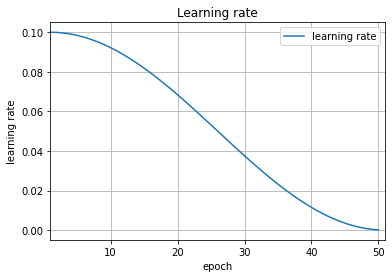

In [ ]:
learning_rate = 0.1
k = 0.1
lrs = [learning_rate] * epochs
for i in range(1, epochs):
    lrs[i] = 0.5 * learning_rate * (1 + math.cos(i * math.pi / epochs))

# plot learning rate
fig = plt.figure()
plt.plot(range(1,epochs+1),lrs,label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,epochs+1])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
# If you're running this notebook on databricks, use display to generate graphs
# display(fig)
# If you're running this notebook locally, use plt.show to generate graphs
# plt.show()
# plt.close(fig)

Epoch 1/50
157/157 - 7s - loss: 0.6922 - accuracy: 0.5246 - val_loss: 0.6790 - val_accuracy: 0.5870
Epoch 2/50
157/157 - 6s - loss: 0.6844 - accuracy: 0.5500 - val_loss: 0.6688 - val_accuracy: 0.6050
Epoch 3/50
157/157 - 6s - loss: 0.6722 - accuracy: 0.5831 - val_loss: 0.6595 - val_accuracy: 0.6020
Epoch 4/50
157/157 - 6s - loss: 0.6649 - accuracy: 0.5961 - val_loss: 0.6566 - val_accuracy: 0.6190
Epoch 5/50
157/157 - 6s - loss: 0.6561 - accuracy: 0.6151 - val_loss: 0.6719 - val_accuracy: 0.5765
Epoch 6/50
157/157 - 6s - loss: 0.6471 - accuracy: 0.6212 - val_loss: 0.6344 - val_accuracy: 0.6420
Epoch 7/50
157/157 - 6s - loss: 0.6362 - accuracy: 0.6318 - val_loss: 0.6355 - val_accuracy: 0.6320
Epoch 8/50
157/157 - 6s - loss: 0.6344 - accuracy: 0.6391 - val_loss: 0.6175 - val_accuracy: 0.6470
Epoch 9/50
157/157 - 6s - loss: 0.6246 - accuracy: 0.6498 - val_loss: 0.6189 - val_accuracy: 0.6460
Epoch 10/50
157/157 - 7s - loss: 0.6223 - accuracy: 0.6486 - val_loss: 0.6144 - val_accuracy: 0.6430

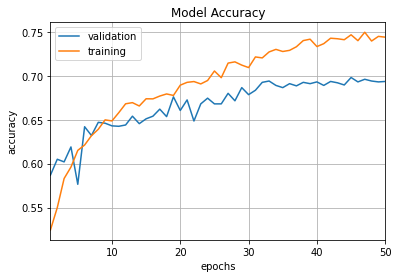

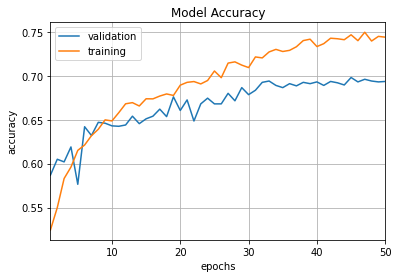

In [ ]:
# define CNN model
model4 = cnn_model()

# define SGD optimizer
momentum = 0.5
sgd = SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False)

# compile the model
model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# define step decay function
def cos_decay(epoch):
    initial_lrate = 0.1
    lrate = 0.5 * initial_lrate * (1 + math.cos(epoch * math.pi / epochs))
    return lrate

# learning schedule callback
lrate_ = LearningRateScheduler(cos_decay)
callbacks_list_ = [lrate_]

# fit the model
history4 = model4.fit(X_train, y_train, 
     validation_data=(X_test, y_test), 
     epochs=epochs, 
     batch_size=batch_size, 
     callbacks=callbacks_list_, 
     verbose=2)

# plot model accuracy
plot_fig(4, history4)